# Naruto Classifier

Import all the packages

In [1]:
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import models
import numpy as np
import cv2
from tensorflow.keras.preprocessing import*
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Data preprocessing using Image data generaotr

In [2]:
train_datagen = ImageDataGenerator(1/255)
test_datagen = ImageDataGenerator(1/255)

In [87]:
train_data = train_datagen.flow_from_directory('D:\\Naruto_data\\train',
                                          target_size = (180,180),
                                          batch_size = 8,
                                              # color_mode = 'grayscale',
                                          class_mode = 'categorical',shuffle =True
                                          )


Found 605 images belonging to 4 classes.


In [88]:
test_data = test_datagen.flow_from_directory('D:\\Naruto_data\\test',
                                          target_size = (180,180),
                                             #color_mode = 'grayscale',
                                          batch_size = 3,
                                          class_mode = 'categorical',shuffle = True
                                            )

Found 180 images belonging to 4 classes.


In [84]:
train_data.class_indices

{'Kakashi': 0, 'Naruto': 1, 'Sakura': 2, 'Sasuke': 3}

CNN Architecture

In [89]:
model = models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (180,180,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
#model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation = 'relu'))
model.add(keras.layers.Dense(4,activation ='softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 87, 87, 32)        9248      
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 18, 18, 64)      

In [90]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

m_history = model.fit(train_data,epochs = 10,
                        validation_data = test_data,
                        verbose = 1)

Epoch 1/10
76/76 [==============================] - 10s 135ms/step - loss: 3.5819 - accuracy: 0.5719 - val_loss: 0.6623 - val_accuracy: 0.7278
Epoch 2/10
76/76 [==============================] - 13s 177ms/step - loss: 0.4434 - accuracy: 0.8364 - val_loss: 0.7227 - val_accuracy: 0.7222
Epoch 3/10
76/76 [==============================] - 14s 186ms/step - loss: 0.5216 - accuracy: 0.8116 - val_loss: 0.7585 - val_accuracy: 0.7444
Epoch 4/10
76/76 [==============================] - 14s 188ms/step - loss: 0.4914 - accuracy: 0.8215 - val_loss: 0.9124 - val_accuracy: 0.6556
Epoch 5/10
76/76 [==============================] - 14s 187ms/step - loss: 0.3916 - accuracy: 0.8430 - val_loss: 0.6559 - val_accuracy: 0.7667
Epoch 6/10
76/76 [==============================] - 14s 183ms/step - loss: 0.2779 - accuracy: 0.9058 - val_loss: 0.5515 - val_accuracy: 0.7944
Epoch 7/10
76/76 [==============================] - 14s 180ms/step - loss: 0.1751 - accuracy: 0.9289 - val_loss: 0.6159 - val_accuracy: 0.7889

In [96]:
model.save("D:\\DL_models\\Naruto_mul")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: D:\DL_models\Naruto_mul\assets


In [97]:
model = keras.models.load_model('D:\\DL_models\\Naruto_mul')
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 87, 87, 32)        9248      
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 18, 18, 64)      

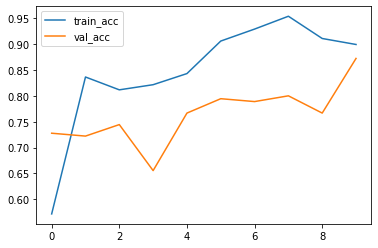

In [98]:
plt.plot(m_history.history['accuracy'],label = 'train_acc')
plt.plot(m_history.history['val_accuracy'],label = 'val_acc')
plt.legend()
plt.show()

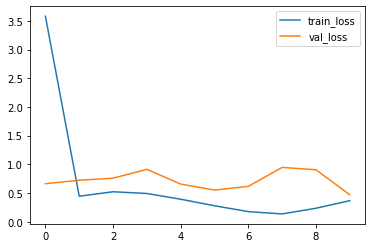

In [99]:
plt.plot(m_history.history['loss'],label = 'train_loss')
plt.plot(m_history.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()

In [93]:
c = {0:'Kakashi',1:'Naruto',2:'Sakura',3:'Sasuke'}

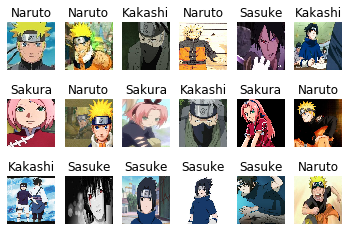

In [100]:
path = 'D:\\test__'
m=0
for i in range(18):
    m+=1
    test_image = image.load_img('D:\\test__\\tt'+str(i)+".jpg", target_size = (180, 180))
    plt.subplot(3,6,m)
    plt.imshow(test_image)
    plt.axis("off")
    test_image = image.img_to_array(test_image)

    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    plt.title(c[np.argmax(result)])